# TP de Graphe :
# 1.1 Construction du graphe

In [48]:
import matplotlib.pyplot as plt

class Graphe:
    def __init__(self):
        self.graphe = {}
        self.depart = None
        self.arrivee = None
        self.non_connectables = set()  # Initialisation de non_connectables

    
    def ajouter_sommet(self, sommet):
        x, y = sommet
        connectable = self.matrice[y][x] != '0'
        if sommet not in self.graphe:
            self.graphe[sommet] = set()
            if not connectable:
                self.non_connectables.add(sommet)
        print("Sommet ajouté:", sommet)  # Ajout d'une instruction print supplémentaire

        # Ajouter les arêtes à partir du fichier
        for voisin in [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]:
            if voisin in self.graphe:
                self.ajouter_arete(sommet, voisin)

    def ajouter_sommet_manuelle(self, sommet, valeur):
        x, y = sommet
        # Étendre la matrice si nécessaire
        while y >= len(self.matrice):
            self.matrice.append(['0'] * len(self.matrice[0]))  # Ajouter une nouvelle ligne pleine de '0'
        while x >= len(self.matrice[y]):
            for ligne in self.matrice:
                ligne.append('0')  # Ajouter un '0' à la fin de chaque ligne existante pour étendre les colonnes

        # Mettre à jour la matrice avec la valeur spécifiée
        self.matrice[y][x] = valeur

        # Vérifier si le sommet est un point de départ ou d'arrivée et si ces points existent déjà
        if valeur == '2' and self.depart is not None:
            print("Un point de départ existe déjà.")
            return
        if valeur == '3' and self.arrivee is not None:
            print("Un point d'arrivée existe déjà.")
            return

        # Définir le départ ou l'arrivée si applicable
        if valeur == '2':
            self.depart = sommet
        if valeur == '3':
            self.arrivee = sommet

        # Ajouter le sommet au graphe s'il est connectable
        connectable = valeur != '0'
        if sommet not in self.graphe:
            self.graphe[sommet] = set()
            if not connectable:
                self.non_connectables.add(sommet)

        # Ajouter les arêtes aux sommets adjacents
        if valeur != '0':
            # Vérifier et ajouter les arêtes avec les voisins
            voisins = [(x-1, y), (x+1, y), (x, y-1), (x, y+1)]  # Voisins potentiels
            for voisin in voisins:
                if voisin[0] >= 0 and voisin[0] < len(self.matrice[0]) and voisin[1] >= 0 and voisin[1] < len(self.matrice):
                    if self.matrice[voisin[1]][voisin[0]] != '0':
                        self.ajouter_arete(sommet, voisin)

    # Cette méthode vérifie si le voisin est valide et s'il est connectable,
    # puis ajoute une arête entre le sommet et le voisin.

    
    def supprimer_sommet(self, sommet):
        if sommet not in self.graphe:
            print("Sommet non trouvé dans le graphe.")
            return

        # Supprimer toutes les arêtes associées au sommet
        voisins = list(self.graphe[sommet])  # Créer une liste des voisins pour éviter la modification pendant l'itération
        for v in voisins:
            self.supprimer_arete(sommet, v)

        # Supprimer le sommet du graphe et des non connectables
        self.graphe.pop(sommet)
        self.non_connectables.discard(sommet)

        # Gérer le départ et l'arrivée
        if sommet == self.depart:
            self.depart = None
        if sommet == self.arrivee:
            self.arrivee = None

        # Supprimer le sommet de la matrice
        x, y = sommet
        self.matrice[y][x] = '0'

        # Vérifier si la ligne entière est vide
        if all(value == '0' for value in self.matrice[y]):
            del self.matrice[y]  # Supprimer la ligne entièrement vide

        # Vérifier si la colonne entière est vide
        if all(self.matrice[i][x] == '0' for i in range(len(self.matrice))):
            for ligne in self.matrice:
                del ligne[x]  # Supprimer la colonne entièrement vide

        print("Sommet ",sommet," et toutes ses connexions supprimés.")

    def ajouter_arete(self, u, v):
        if u in self.graphe and v in self.graphe:  # Vérifier si les sommets existent dans le graphe
            if u not in self.graphe[v] and v not in self.graphe[u]:  # Vérifier si l'arête n'existe pas déjà
                self.graphe[u].add(v)
                self.graphe[v].add(u)
                print("Arête ajoutée entre ", u, " et ", v)
            else:
                print("L'arête entre ", u, " et ", v, " existe déjà.")
        else:
            print("Impossible d'ajouter l'arête entre ", u, " et ", v, ": sommets inexistants dans le graphe.")


    def supprimer_arete(self, u, v):
        if u in self.graphe and v in self.graphe:
            self.graphe[u].discard(v)
            self.graphe[v].discard(u)
    

    def creer_graphe_depuis_fichier(self, chemin_fichier):
        with open(chemin_fichier, 'r') as fichier:
            lignes = fichier.readlines()

        n, m = map(int, lignes[0].split())
        self.matrice = [ligne.split() for ligne in lignes[1:]]

        for y in range(n):
            for x in range(m):
                if self.matrice[y][x] == '2':
                    self.depart = (x, y)
                if self.matrice[y][x] == '3':
                    self.arrivee = (x, y)
                self.ajouter_sommet((x, y))

        print("Matrice créée:")
        self.afficher_matrice()  # Ajout d'une instruction print supplémentaire


    
    def afficher_matrice(self):
        # Utiliser la matrice existante pour l'affichage
        for ligne in self.matrice:
            print(' '.join(ligne))

    def tracer_graphe(self):
        plt.figure(figsize=(8, 6))
        # Dessiner les arêtes
        for u in self.graphe:
            for v in self.graphe[u]:
                plt.plot([u[0], v[0]], [u[1], v[1]], 'b-', linewidth=1)

        # Dessiner les sommets
        for u in self.graphe:
            color = 'grey' if u in self.non_connectables else 'black'
            plt.plot(u[0], u[1], 'o', color=color, markersize=8)

        # Mettre en évidence les points de départ et d'arrivée
        if self.depart:
            plt.plot(self.depart[0], self.depart[1], 'go', markersize=10)
        if self.arrivee:
            plt.plot(self.arrivee[0], self.arrivee[1], 'ro', markersize=10)

        plt.xlabel('X coordinate')
        plt.ylabel('Y coordinate')
        plt.title('Visualisation du Graphe')
        plt.gca().invert_yaxis()
        plt.grid(True)
        plt.show()


# Exemple d'utilisation

# Usage example
graphe = Graphe()
graphe.creer_graphe_depuis_fichier('exo1.txt')  # Assurez-vous que le chemin d'accès est correcte
graphe.afficher_matrice()

Sommet ajouté: (0, 0)
Sommet ajouté: (1, 0)
Arête ajoutée entre  (1, 0)  et  (0, 0)
Sommet ajouté: (2, 0)
Arête ajoutée entre  (2, 0)  et  (1, 0)
Sommet ajouté: (3, 0)
Arête ajoutée entre  (3, 0)  et  (2, 0)
Sommet ajouté: (4, 0)
Arête ajoutée entre  (4, 0)  et  (3, 0)
Sommet ajouté: (5, 0)
Arête ajoutée entre  (5, 0)  et  (4, 0)
Sommet ajouté: (6, 0)
Arête ajoutée entre  (6, 0)  et  (5, 0)
Sommet ajouté: (7, 0)
Arête ajoutée entre  (7, 0)  et  (6, 0)
Sommet ajouté: (8, 0)
Arête ajoutée entre  (8, 0)  et  (7, 0)
Sommet ajouté: (0, 1)
Arête ajoutée entre  (0, 1)  et  (0, 0)
Sommet ajouté: (1, 1)
Arête ajoutée entre  (1, 1)  et  (0, 1)
Arête ajoutée entre  (1, 1)  et  (1, 0)
Sommet ajouté: (2, 1)
Arête ajoutée entre  (2, 1)  et  (1, 1)
Arête ajoutée entre  (2, 1)  et  (2, 0)
Sommet ajouté: (3, 1)
Arête ajoutée entre  (3, 1)  et  (2, 1)
Arête ajoutée entre  (3, 1)  et  (3, 0)
Sommet ajouté: (4, 1)
Arête ajoutée entre  (4, 1)  et  (3, 1)
Arête ajoutée entre  (4, 1)  et  (4, 0)
Sommet ajout

Arête ajoutée entre  (0, 0)  et  (0, 1)
Arête ajoutée entre  (1, 0)  et  (2, 0)


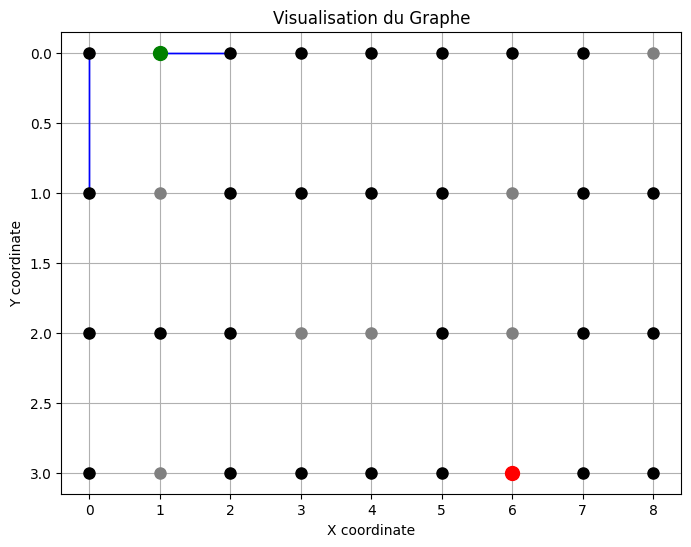

In [40]:
# Colonne en premier et ligne en deuxième pour chaque coordonnées.
graphe.ajouter_arete((0,0),(0,1))
graphe.ajouter_arete((1,0),(2,0))

graphe.tracer_graphe()

Arête ajoutée entre  (0, 0)  et  (1, 0)


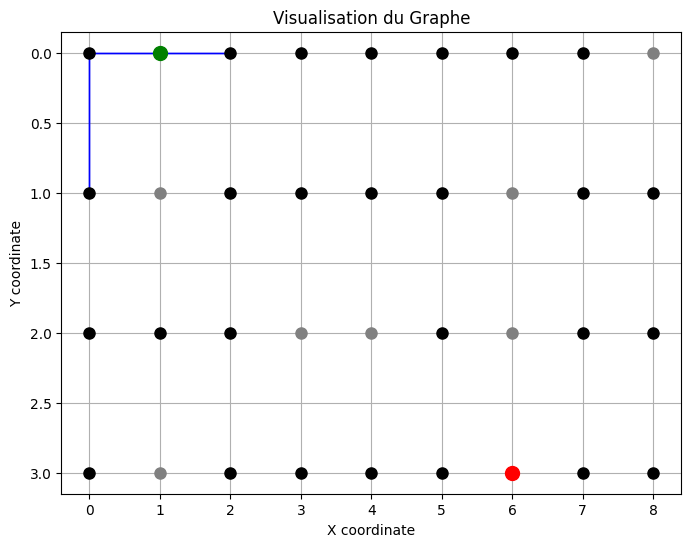

In [33]:
graphe.ajouter_arete((0,0),(1,0))
graphe.tracer_graphe()


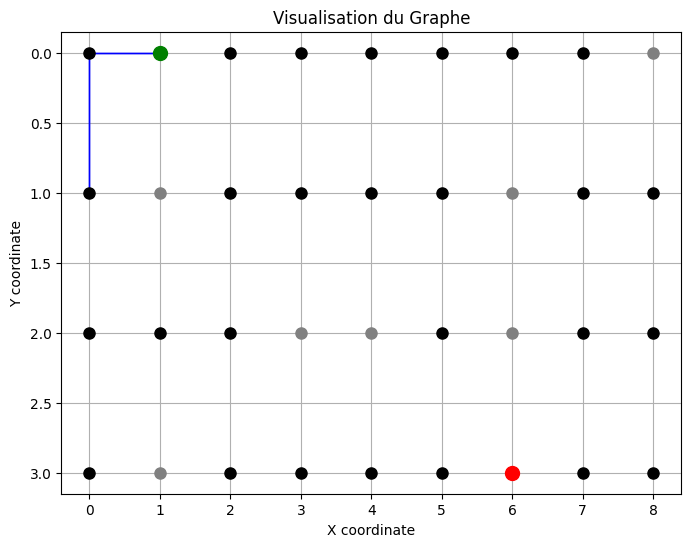

In [34]:
# Test suppression
graphe.supprimer_arete((1, 0), (2, 0))
graphe.tracer_graphe()


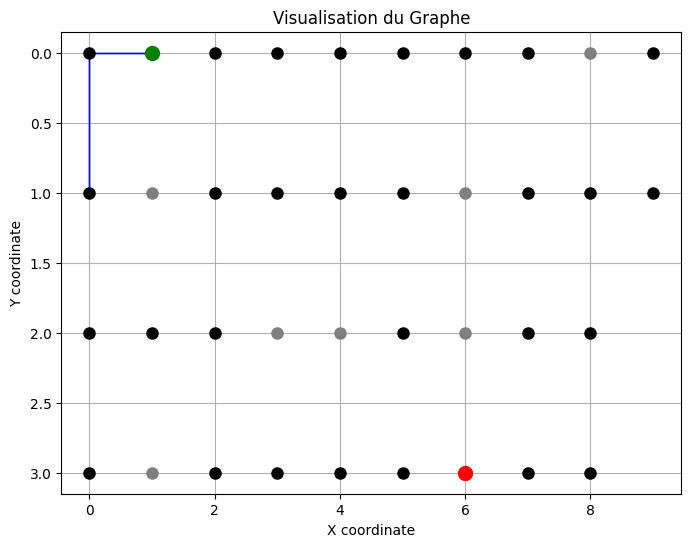

In [35]:
graphe.ajouter_sommet_manuelle((9,0),1)
graphe.ajouter_sommet_manuelle((9,1),1)
graphe.tracer_graphe()

Arête ajoutée entre  (9, 0)  et  (9, 1)


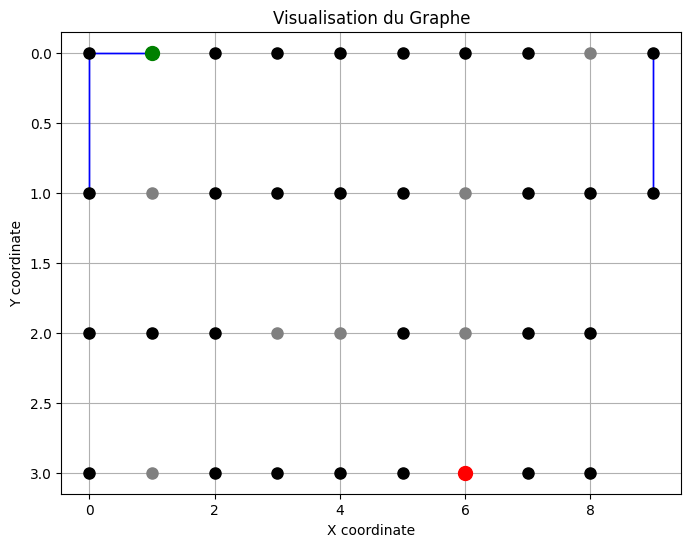

In [36]:
graphe.ajouter_arete((9,0),(9,1))
graphe.tracer_graphe()

Sommet  (9, 0)  et toutes ses connexions supprimés.


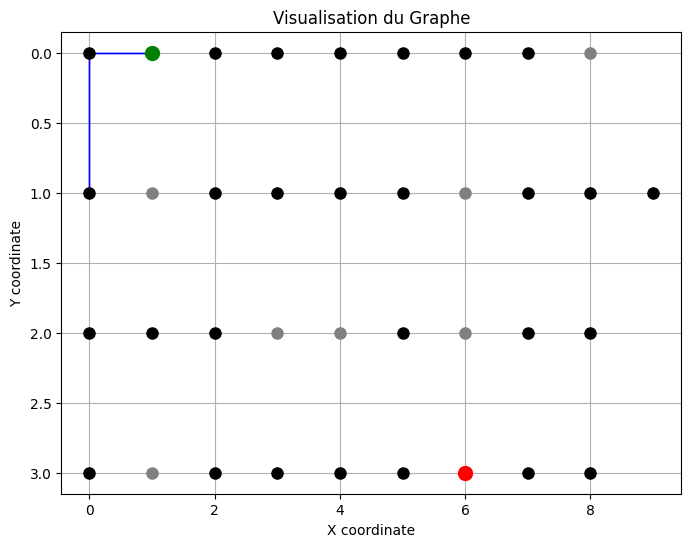

In [37]:
graphe.supprimer_sommet((9,0))
graphe.tracer_graphe()

Sommet  (9, 1)  et toutes ses connexions supprimés.


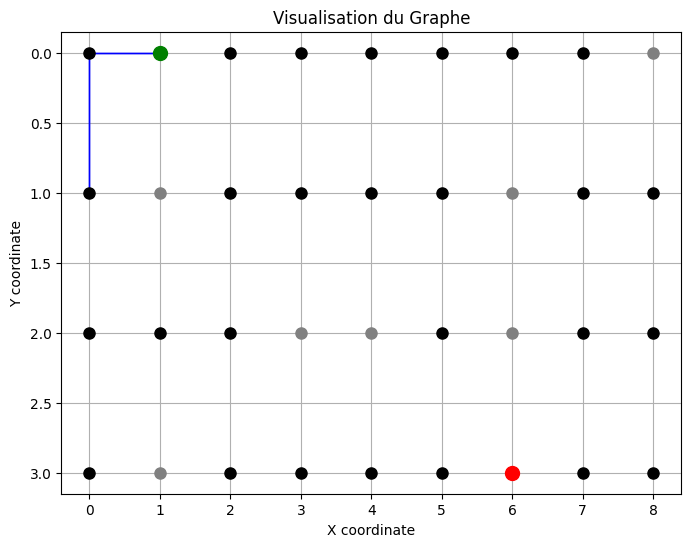

In [38]:
graphe.supprimer_sommet((9,1))
graphe.tracer_graphe()

# 1.2 Modélisation mathématique

## Modélisation du Problème en Programmation Linéaire

Le problème du plus court chemin dans un graphe peut être formulé comme un problème de programmation linéaire. Ce problème consiste à trouver le chemin le moins coûteux entre une source et une destination dans un graphe.

### Variables
Pour chaque arête $(u, v)$ dans le graphe, nous définissons une variable binaire $x_{uv}$ qui indique si l'arête $(u, v)$ est utilisée dans le chemin le plus court.

### Fonction Objectif
La fonction objectif est de minimiser le coût total du chemin. Cela est exprimé comme suit :

$$ \min \sum_{(u, v) \in E} c_{uv} x_{uv} $$

où $c_{uv}$ représente le coût de l'arête $(u, v)$.

### Contraintes

#### Conservation du Flux
Pour chaque sommet $v$ autre que la source $s$ et la destination $t$, la conservation du flux doit être respectée :

$$ \sum_{(u, v) \in E} x_{uv} - \sum_{(v, w) \in E} x_{vw} = 0 $$

#### Contraintes de la Source et de la Destination
La source $s$ doit avoir exactement une arête sortante active et la destination $t$ doit avoir exactement une arête entrante active :

- Pour la source $s$ :
$$ \sum_{(s, v) \in E} x_{sv} = 1 $$

- Pour la destination $t$ :
$$ \sum_{(u, t) \in E} x_{ut} = 1 $$

## Résumé
Cette modélisation permet de transformer le problème du plus court chemin en un problème de programmation linéaire, où la solution optimale indique le chemin le plus court en termes de coût entre deux points donnés dans un réseau.


## Implémentation avec CPLEX

In [54]:
from cplex import Cplex
from cplex.exceptions import CplexError

def generate_costs_from_graph(graphe):
    costs = {}
    for u in graphe.graphe:
        for v in graphe.graphe[u]:
            # Vérifiez si (u, v) ou (v, u) n'est pas déjà présent dans les coûts
            if (u, v) not in costs and (v, u) not in costs:
                costs[(u, v)] = 1  # Assuming the cost of each edge is 1 for simplicity
                costs[(v, u)] = 1
    print("Costs generated:", costs)
    return costs

def setup_problem(graph, costs, s, t):
    prob = Cplex()
    prob.set_problem_type(prob.problem_type.LP)
    prob.objective.set_sense(prob.objective.sense.minimize)
    edge_vars = {}
    lin_expr = []  # Liste des expressions linéaires pour les contraintes
    for u in graph:
        for v in graph[u]:
            var_name = f"x_{u}_{v}"
            edge_vars[(u, v)] = var_name
            prob.variables.add(obj=[costs[(u, v)]], lb=[0], ub=[1], types=["B"], names=[var_name])
            lin_expr.append([[var_name], [1]])  # Ajoute chaque variable et son coefficient à lin_expr
    # Ajoute les contraintes pour chaque nœud
    for v in graph:
        inflow = [[edge_vars[(u, v)] for u in graph if v in graph[u]], [1] * len(graph[v])]
        outflow = [[edge_vars[(v, u)] for u in graph[v]], [-1] * len(graph[v])]
        lin_expr.extend([inflow, outflow])
    # Ajoute les contraintes pour le nœud source
    source_out = [[edge_vars[(s, v)] for v in graph[s]], [1] * len(graph[s])]
    lin_expr.append(source_out)
    # Ajoute les contraintes pour le nœud destination
    destination_in = [[edge_vars[(u, t)] for u in graph if t in graph[u]], [1] * len([u for u in graph if t in graph[u]])]
    lin_expr.append(destination_in)
    # Ajoute les contraintes linéaires au problème
    prob.linear_constraints.add(lin_expr=lin_expr, senses=["E"] * len(lin_expr), rhs=[0] * len(lin_expr))
    return prob, list(edge_vars.values())

def solve_problem(prob):
    try:
        prob.solve()
    except CplexError as exc:
        print(exc)
        return None
    return prob.solution.get_values()

def save_solution(solution, edge_vars, input_filename):
    if solution is None:
        print("Aucune solution trouvée. Impossible de sauvegarder.")
        return

    output_filename = "sol_" + input_filename
    try:
        with open(output_filename, 'w') as f:
            for var, value in zip(edge_vars, solution):
                # Recherche de l'arête correspondante dans le nom de la variable
                u, v = var.split('_')[1], var.split('_')[2]
                if value > 0.5:
                    f.write(f"({u}, {v}) = {value}\n")
        print(f"La solution a été sauvegardée dans {output_filename}.")
    except Exception as e:
        print(f"Une erreur s'est produite lors de la sauvegarde de la solution : {e}")


# Usage example
input_filename = 'reseau_10_10_2.txt'
graphe = Graphe()
graphe.creer_graphe_depuis_fichier(input_filename)
# Affichage du graphe
print("Graphe :")
print(graphe.graphe)
costs = generate_costs_from_graph(graphe)
s, t = graphe.depart, graphe.arrivee
prob, edge_vars = setup_problem(graphe.graphe, costs, s, t)
solution = solve_problem(prob)
save_solution(solution, edge_vars, input_filename)


Sommet ajouté: (0, 0)
Sommet ajouté: (1, 0)
Arête ajoutée entre  (1, 0)  et  (0, 0)
Sommet ajouté: (2, 0)
Arête ajoutée entre  (2, 0)  et  (1, 0)
Sommet ajouté: (3, 0)
Arête ajoutée entre  (3, 0)  et  (2, 0)
Sommet ajouté: (4, 0)
Arête ajoutée entre  (4, 0)  et  (3, 0)
Sommet ajouté: (5, 0)
Arête ajoutée entre  (5, 0)  et  (4, 0)
Sommet ajouté: (6, 0)
Arête ajoutée entre  (6, 0)  et  (5, 0)
Sommet ajouté: (7, 0)
Arête ajoutée entre  (7, 0)  et  (6, 0)
Sommet ajouté: (8, 0)
Arête ajoutée entre  (8, 0)  et  (7, 0)
Sommet ajouté: (9, 0)
Arête ajoutée entre  (9, 0)  et  (8, 0)
Sommet ajouté: (0, 1)
Arête ajoutée entre  (0, 1)  et  (0, 0)
Sommet ajouté: (1, 1)
Arête ajoutée entre  (1, 1)  et  (0, 1)
Arête ajoutée entre  (1, 1)  et  (1, 0)
Sommet ajouté: (2, 1)
Arête ajoutée entre  (2, 1)  et  (1, 1)
Arête ajoutée entre  (2, 1)  et  (2, 0)
Sommet ajouté: (3, 1)
Arête ajoutée entre  (3, 1)  et  (2, 1)
Arête ajoutée entre  (3, 1)  et  (3, 0)
Sommet ajouté: (4, 1)
Arête ajoutée entre  (4, 1)  e